In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

data = pd.read_csv(r'C:\Users\joshu\Desktop\Heart\heart.csv')

data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
features = data[ ['Age','Sex','Cholesterol', 'RestingBP','RestingECG','ExerciseAngina','MaxHR','HeartDisease']].copy()

features.head(10)

,Age,Sex,Cholesterol,RestingBP,RestingECG,ExerciseAngina,MaxHR,HeartDisease
0,40,M,289,140,Normal,N,172,0
1,49,F,180,160,Normal,N,156,1
2,37,M,283,130,ST,N,98,0
3,48,F,214,138,Normal,Y,108,1
4,54,M,195,150,Normal,N,122,0
5,39,M,339,120,Normal,N,170,0
6,45,F,237,130,Normal,N,170,0
7,54,M,208,110,Normal,N,142,0
8,37,M,207,140,Normal,Y,130,1
9,48,F,284,120,Normal,N,120,0


In [16]:
data = data[data['HeartDisease'] != 0]

restingMean = data['RestingBP'].groupby(data['ChestPainType'])
means = restingMean.mean()

dfBp = means.to_frame(name = 'Average Resting Blood Pressure')

dfBp.head(4)

,Average Resting Blood Pressure
ChestPainType,
ASY,134.091837
ATA,139.666667
NAP,132.958333
TA,133.850000


In [21]:
data = data[data['HeartDisease'] != 1]

restingMean = data['RestingBP'].groupby(data['ChestPainType'])
means = restingMean.mean()

dfBp = means.to_frame(name = 'Average Resting Blood Pressure')

dfBp.head(4)

,Average Resting Blood Pressure
ChestPainType,
ASY,129.980769
ATA,129.167785
NAP,129.862595
TA,138.384615


In [17]:
data= data[data['Cholesterol'] != 0]
data = data[data['HeartDisease'] != 0]

cholesterolMean = data['Cholesterol'].groupby(data['ChestPainType'])
meansC = cholesterolMean.mean()

dfChol = meansC.to_frame(name = 'Average Cholesterol')

dfChol.head(4)

,Average Cholesterol
ChestPainType,
ASY,251.759124
ATA,266.619048
NAP,240.500000
TA,248.933333


In [22]:
data= data[data['Cholesterol'] != 0]
data = data[data['HeartDisease'] != 1]

cholesterolMean = data['Cholesterol'].groupby(data['ChestPainType'])
meansC = cholesterolMean.mean()

dfChol = meansC.to_frame(name = 'Average Cholesterol')

dfChol.head(4)

,Average Cholesterol
ChestPainType,
ASY,245.770833
ATA,239.434483
NAP,235.910569
TA,222.730769


In [18]:
data = data[data['HeartDisease'] != 0]

heartRateMean = data['MaxHR'].groupby(data['ChestPainType'])
meansHR = heartRateMean.mean()

dfHR = meansHR.to_frame(name = 'Average Max Heart Rate')

dfHR.head(4)

,Average Max Heart Rate
ChestPainType,
ASY,128.080292
ATA,141.523810
NAP,134.652174
TA,147.733333


In [23]:
data = data[data['HeartDisease'] != 1]

heartRateMean = data['MaxHR'].groupby(data['ChestPainType'])
meansHR = heartRateMean.mean()

dfHR = meansHR.to_frame(name = 'Average Max Heart Rate')

dfHR.head(4)

,Average Max Heart Rate
ChestPainType,
ASY,139.520833
ATA,152.800000
NAP,151.788618
TA,150.500000


In [27]:
restingSTD = data['RestingBP'].groupby(data['ChestPainType'])
std = restingSTD.std()

dfBpSTD = std.to_frame(name = 'Standard Dev of Resting Blood Pressure')

dfBpSTD.head(4)

,Standard Dev of Resting Blood Pressure
ChestPainType,
ASY,18.580961
ATA,16.861711
NAP,19.412878
TA,19.059644


In [32]:
cholSTD = data['Cholesterol'].groupby(data['ChestPainType'])
stdChol = cholSTD.std()

dfCholSTD = stdChol.to_frame(name = 'Standard Dev of Cholesterol')

dfCholSTD.head(4)

,Standard Dev of Cholesterol
ChestPainType,
ASY,63.555673
ATA,50.991523
NAP,59.126312
TA,42.529660


In [30]:
heartRateSTD = data['MaxHR'].groupby(data['ChestPainType'])
stdHR = heartRateSTD.std()

dfHRSTD = stdHR.to_frame(name = 'Standard Dev of Max Heart Rate')

dfHRSTD.head(4)

,Standard Dev of Max Heart Rate
ChestPainType,
ASY,23.483317
ATA,22.281042
NAP,25.608501
TA,23.126923


In [37]:
dataAge_mean = data['Age'].mean()

print("Average Age: ",dataAge_mean)

Average Age:  52.88203753351206


In [47]:
featuresFemale = features[features['Sex'] != 'M']

featuresFemale.head(10)

,Age,Sex,Cholesterol,RestingBP,RestingECG,ExerciseAngina,MaxHR,HeartDisease
1,49,F,180,160,Normal,N,156,1
3,48,F,214,138,Normal,Y,108,1
6,45,F,237,130,Normal,N,170,0
9,48,F,284,120,Normal,N,120,0
10,37,F,211,130,Normal,N,142,0
14,42,F,211,115,ST,N,137,0
15,54,F,273,120,Normal,N,150,0
17,43,F,201,120,Normal,N,165,0
20,43,F,223,100,Normal,N,142,0
22,49,F,201,124,Normal,N,164,0


In [42]:
featuresMale = features[features['Sex'] != 'F']

featuresMale.head(10)

,Age,Sex,Cholesterol,RestingBP,RestingECG,ExerciseAngina,MaxHR,HeartDisease
0,40,M,289,140,Normal,N,172,0
2,37,M,283,130,ST,N,98,0
4,54,M,195,150,Normal,N,122,0
5,39,M,339,120,Normal,N,170,0
7,54,M,208,110,Normal,N,142,0
8,37,M,207,140,Normal,Y,130,1
11,58,M,164,136,ST,Y,99,1
12,39,M,204,120,Normal,N,145,0
13,49,M,234,140,Normal,Y,140,1
16,38,M,196,110,Normal,N,166,1


In [51]:
featuresMale = featuresMale[featuresMale['Cholesterol'] != 0]

print(featuresMale['Age'].mean())
print(featuresMale['Cholesterol'].mean())
print(featuresFemale['Cholesterol'].std())

53.10283687943262
241.04078014184398
62.85006993918601


In [52]:
featuresFemale = featuresFemale[featuresFemale['Cholesterol'] != 0]

print(featuresFemale['Age'].mean())
print(featuresFemale['Cholesterol'].mean())
print(featuresFemale['Cholesterol'].std())

52.1978021978022
255.77472527472528
62.85006993918601


<AxesSubplot:ylabel='Frequency'>

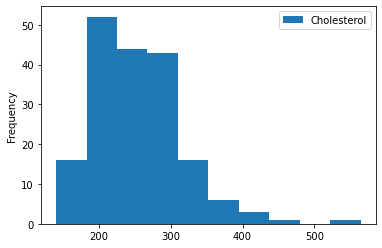

In [53]:
featuresFemale[[ 'Cholesterol']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

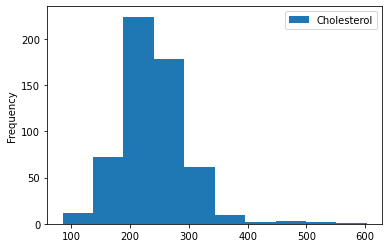

In [54]:
featuresMale[[ 'Cholesterol']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

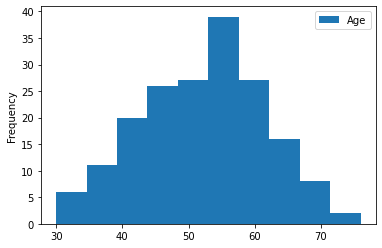

In [55]:
featuresFemale[[ 'Age']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

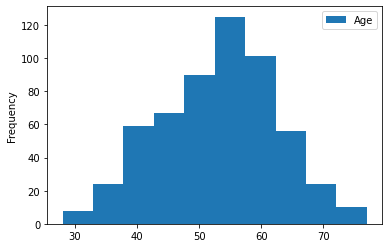

In [56]:
featuresMale[[ 'Age']].plot.hist()